<a href="https://colab.research.google.com/github/charlieLehman/mlmath/blob/master/HW08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from scipy.io import loadmat
from scipy.special import legendre
from scipy.integrate import quad
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline
from tqdm import tqdm
from IPython.display import display, Math, Latex, HTML
from google.colab.output._publish import javascript
url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
data_path = "gdrive/My Drive/Colab Notebooks/mlmath_data/hw06p6_data.mat"

def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

# 1.

This week was a deep dive into Maximum Likelihood Estimation and the properties of estimators.  Much of the skills used in solving linear systems still apply as the interaction between moments is often characterized as linear operators and the solutions to many of these problems comes down to the same techniques.  As the estimation of paramaters is done on random variables the estimator itself can be characterized as a random variable with characteristics of it's own.  This brings rise to bias and variance for the estimator directly, which allows for characterization of estimators with functional analysis.  

# 2.

In [228]:
R = [[1, 1/3, 1/9, 1/27, 1/81],
    [1/3, 1, 1/3, 1/9, 1/27],
    [1/9, 1/3, 1, 1/3, 1/9],
    [1/27, 1/9, 1/3, 1, 1/3],
    [1/81, 1/27, 1/9, 1/3, 1]]
R = np.array(R)

np.set_printoptions(precision=3)
Q = np.linalg.cholesky(R)
print(Q)


[[1.    0.    0.    0.    0.   ]
 [0.333 0.943 0.    0.    0.   ]
 [0.111 0.314 0.943 0.    0.   ]
 [0.037 0.105 0.314 0.943 0.   ]
 [0.012 0.035 0.105 0.314 0.943]]


# 5.

## (a)

No handles with labels found to put in legend.


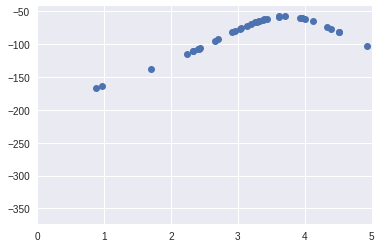

[0.003]


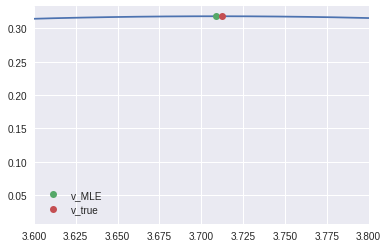

In [229]:
data = loadmat('hw08p5a.mat')
x = data['x']

f_x = lambda x,v: 1/(np.pi*(1+(x-v)**2))
l = lambda x,v: np.log(f_x(x,v))
t = np.linspace(0,5, 300)

vmn = lambda n: x[:n+1].sum()/(n+1)
vmd = lambda n:  (x[int((n+1)/2)]+x[int((n+1)/2+1)])/2 if (n & 0x1) else (x[int((n)/2)])


vmle = np.array([l(x,vmn(n)) for n in range(50)]).sum(0)

vmle_hat = x[vmle.argmax(0)][0] 
vmle = np.array([l(x,vmle_hat) for n in range(50)]).sum(0)
plt.plot(x, vmle,'o')
plt.xlim([0,5])
plt.legend()
plt.show()
plt.plot(t,f_x(t, vmle_hat))

max_fx = t[f_x(t, x.mean()).argmax(0)]
print(max_fx - vmle_hat)
plt.plot(vmle_hat,f_x(vmle_hat, vmle_hat), 'o', label='v_MLE')
plt.plot(max_fx,f_x(max_fx, vmle_hat), 'o', label='v_true')
plt.xlim([3.6,3.8])
plt.legend()

## (b)

In [230]:
data = loadmat('hw08p5b.mat')
X = data['X']
print(X.shape)

vmn = lambda n: X[:n+1].sum(0)/(n+1)
vmd = lambda n: (X[int((n+1)/2)]+X[int((n+1)/2+1)])/2 if (n & 0x1) else (X[int((n)/2)])
print('sample mean: ' , ((vmn(50) - f_x(t,0).max())**2).mean())
print('sample median: ', ((vmd(50) - f_x(t,0).max())**2).mean())


(50, 1000)
sample mean:  870.7377730981575
sample median:  1255.1588358079125


## (c)

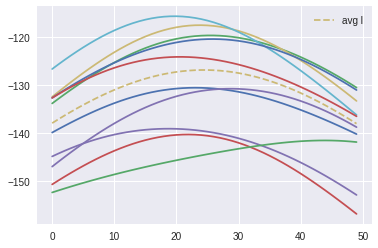

In [231]:
v = np.linspace(-1,1)
for m in range(10):
    vmle = np.array([l(X[n,m],v) for n in range(50)]).sum(0)
    plt.plot(vmle)

vmle = np.empty_like(vmle)
for m in range(1000):
    vmle += np.array([l(X[n,m],v) for n in range(50)]).sum(0)
plt.plot(vmle/1000, '--', label='avg l')
plt.legend()